In [1]:
# Standard library imports
import warnings

# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistics and data preprocessing
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.metrics import (
    pairwise_distances, 
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (
    GridSearchCV, 
    train_test_split, 
    KFold, 
    cross_val_score
)
from mpl_toolkits.mplot3d import Axes3D

# Miscellaneous settings
warnings.filterwarnings('ignore')
%matplotlib inline
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:


# Import files here;

# Using absolute paths
file_1 = r"C:\Users\kaan\Documents\Thesis Data\exp010_pixelIntensity_FastPlastic_structure\010_test_fast_dissolving_structure_PVBplastic\data\csv\010_intensity_metrics.csv"
file_2 = r"C:\Users\kaan\Documents\Thesis Data\exp010_pixelIntensity_FastPlastic_structure\010_test_Fast_Dissolving_Structure_PVBplastic-2\data\csv\010_intensity_metrics.csv"

# Read the files
df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)

print(df1.shape)
print(df2.shape)


(931, 6)
(155391, 6)



Combine 2 files together


In [ ]:
# Combine files with continuous time
if df1 is not None and df2 is not None:
    # Get the last elapsed time from each dataframe
    last_time_df1 = df1['elapsed_time'].iloc[-1] if not df1.empty else 0
    last_time_df2 = df2['elapsed_time'].iloc[-1] if not df2.empty else 0
    
    # Adjust the elapsed_time in df2
    df2['elapsed_time'] = df2['elapsed_time'] + last_time_df1

    
    # Combine all dataframes
    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Display information about the combined dataframe
    print("Combined DataFrame Shape:", combined_df.shape)
    print("\nFirst few rows:")
    print(combined_df.head())
    print("\nLast few rows:")
    print(combined_df.tail())
    
    # Save the combined dataframe to a new CSV file
    output_file = "combined_data.csv"
    combined_df.to_csv(output_file, index=False)
    print(f"\nCombined data saved to {output_file}")
else:
    print("Could not combine files due to missing data")

file = "combined_data.csv"

Combined DataFrame Shape: (156322, 6)

First few rows:
  timestamp  elapsed_time  Test_fast_Dissolving_1_avg_intensity  \
0  15_04_06          0.00                            214.847554   
1  15_04_08          2.06                            216.522057   
2  15_04_10          4.08                            215.133021   
3  15_04_12          6.16                            217.893896   
4  15_04_14          8.25                            217.055154   

   Test_fast_Dissolving_1_std_intensity  Test_fast_Dissolving_1_min_intensity  \
0                              2.631439                                   183   
1                              2.641195                                   186   
2                              2.323679                                   188   
3                              2.679694                                   192   
4                              3.067656                                   183   

   Test_fast_Dissolving_1_max_intensity  
0            

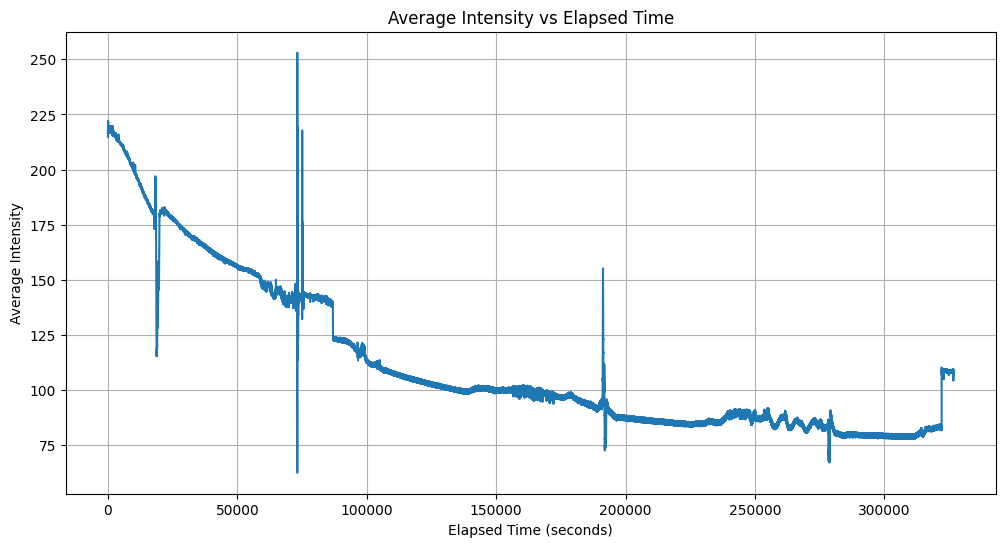

In [4]:

# Read the CSV file
data = pd.read_csv('combined_data.csv')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data['elapsed_time'], data['Test_fast_Dissolving_1_avg_intensity'])

# Add labels and title
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Average Intensity')
plt.title('Average Intensity vs Elapsed Time')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [9]:
def convert_intensity_to_concentration(input_file, output_file):
    # Read the original data
    data = pd.read_csv(input_file)
    
    # Convert intensity to absorbance first: Abs = log10(blank/experimental)
    # Assuming blank intensity is the maximum intensity in your data
    blank_intensity = 215
    absorbance = np.log10(blank_intensity / data['Test_fast_Dissolving_1_avg_intensity'])
    
    # Convert absorbance to concentration using the calibration equation
    # Using y = 14.6369x + -0.0063
    # Rearranging to solve for x: x = (y + 0.0063) / 14.6369
    concentration = (absorbance + 0.0123) / 15.9017
    
    # Create a new dataframe with both original data and concentration
    result_df = data.copy()
    result_df['concentration_g_mL'] = concentration
    
    # Save to new CSV file
    result_df.to_csv(output_file, index=False)
    print(f"Conversion complete. Results saved to {output_file}")
    return result_df

# Use the function
converted_data = convert_intensity_to_concentration(
    'combined_data.csv', 
    'combined_data_with_concentration.csv'
)

# Display the first few rows to verify
print("\nFirst few rows of converted data:")
print(converted_data[['elapsed_time', 'Test_fast_Dissolving_1_avg_intensity', 'concentration_g_mL']].head())

Conversion complete. Results saved to combined_data_with_concentration.csv

First few rows of converted data:
   elapsed_time  Test_fast_Dissolving_1_avg_intensity  concentration_g_mL
0          0.00                            214.847554            0.000793
1          2.06                            216.522057            0.000581
2          4.08                            215.133021            0.000757
3          6.16                            217.893896            0.000408
4          8.25                            217.055154            0.000514


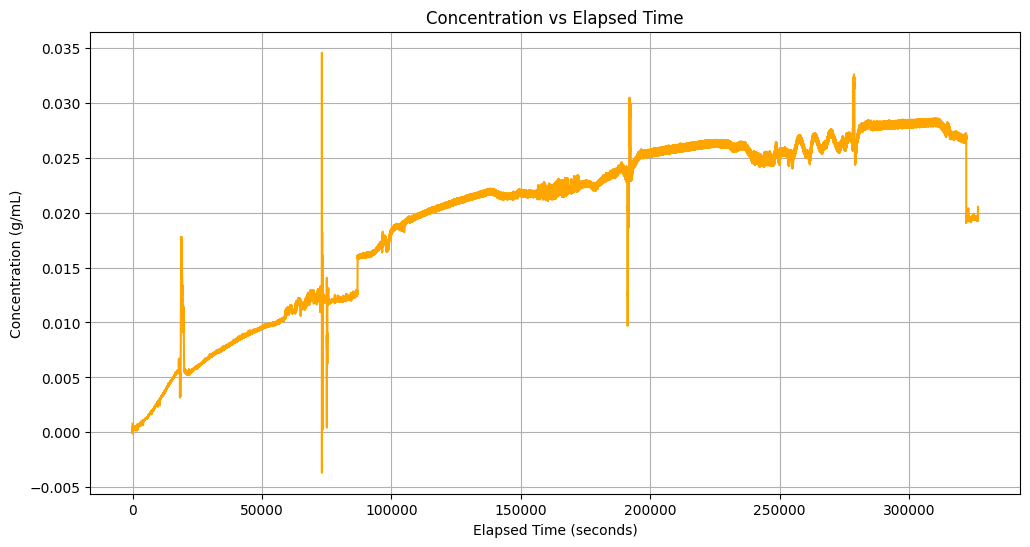

In [10]:

# Read the CSV file
data2 = pd.read_csv('combined_data_with_concentration.csv')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data2['elapsed_time'], data2['concentration_g_mL'], label='Concentration (g/mL)', color='orange')

# Add labels and title
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Concentration (g/mL)')
plt.title('Concentration vs Elapsed Time')

# Add grid
plt.grid(True)

# Show the plot
plt.show()